Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [253]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from glob import glob

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [137]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [273]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train")
data_dir_test = pathlib.Path('/Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/test')

In [139]:
print(data_dir_train, '\n', data_dir_test)

/Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train 
 /Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/test


In [140]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [141]:
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9

Use 80% of the images for training, and 20% for validation.

In [142]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# train_ds = ##todo




In [143]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds, val_ds = image_dataset_from_directory(data_dir_train, labels='inferred', batch_size=batch_size, 
                                        image_size = (img_height, img_width), seed=123, validation_split = 0.2, subset='both', shuffle=True)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Using 447 files for validation.


In [144]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# val_ds = #todo

In [145]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

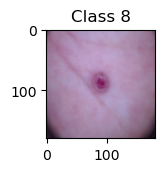

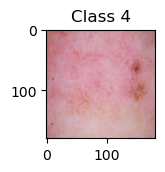

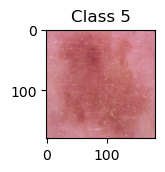

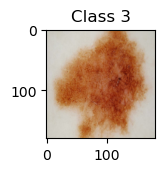

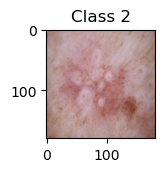

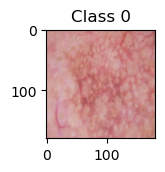

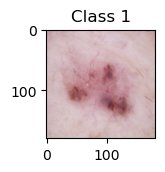

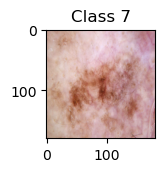

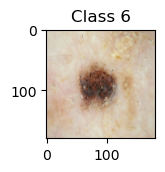

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize dictionary to store one image per class
class_images = {}

# Iterate through batches of the dataset
for batch in train_ds:
    images, labels = batch  # Get a batch of images and labels

    # Iterate through images and labels in the batch
    for img, label in zip(images, labels):
        class_no = int(label.numpy())  # Convert the label to an integer
        
        # Only store an image for the class if it's not already stored
        if class_no not in class_images:
            class_images[class_no] = img.numpy()  # Store the image as a numpy array
        
        # If we've stored one image for every class, break the loop
        if len(class_images) == num_classes:
            break
    if len(class_images) == num_classes:
        break

i=0
for class_no, img in class_images.items():
    plt.subplot(3, 3, i + 1)
    img=np.clip(img,0, 255).astype(np.uint8)
    plt.imshow(img)  # Assuming grayscale images, adjust for RGB
    plt.title(f"Class {class_no}")
    plt.show()
    i+=1


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [147]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [148]:
image, label = next(iter(train_ds))
input_shape = image.shape[1:]

print(input_shape)

(180, 180, 3)


In [149]:
# for i in range(32):
#     print(tf.reduce_max(image[i])
#     ,tf.reduce_min(image[i]))

In [150]:
def preprocess(image, label):
    image = image/255
    label = keras.utils.to_categorical(label, num_classes)
    return image, label

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)


In [151]:
# image, label = next(iter(train_ds))
# input_shape = image.shape[1:]

# print(input_shape)

In [152]:
for images, labels in train_ds.take(1):
    print("Image shape:", images.shape)  # Should be (batch_size, height, width, channels)
    print("Label shape:", labels.shape) 

for images, labels in val_ds.take(1):
    print("Image shape:", images.shape)  # Should be (batch_size, height, width, channels)
    print("Label shape:", labels.shape) 
    print(images[0:3,0:3,0])

Image shape: (32, 180, 180, 3)
Label shape: (32, 9)
Image shape: (32, 180, 180, 3)
Label shape: (32, 9)
tf.Tensor(
[[[0.8869281  0.775817   0.82810456]
  [0.8910131  0.7756536  0.82892156]
  [0.89117646 0.77924836 0.81879085]]

 [[0.54862744 0.4701961  0.33294117]
  [0.54244447 0.4718562  0.3228366 ]
  [0.5450327  0.47836602 0.33718956]]

 [[0.60188526 0.5729964  0.49848658]
  [0.6022614  0.5904967  0.5159869 ]
  [0.61386347 0.5864125  0.5119027 ]]], shape=(3, 3, 3), dtype=float32)


2024-10-17 16:58:17.016798: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-10-17 16:58:17.052212: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [153]:
### Your code goes here



model = keras.Sequential(

[
layers.Conv2D(32, kernel_size = (3,3), padding = 'same', strides=1, activation='relu', input_shape = input_shape),
layers.MaxPool2D((2,2)),

layers.Conv2D(64, kernel_size = (3,3), padding = 'same', strides=1, activation='relu'),
layers.MaxPool2D((2,2)),

layers.Conv2D(128, kernel_size = (3,3), padding = 'same', strides=1, activation='relu'),
layers.MaxPool2D((2,2)),

# layers.Conv2D(256, kernel_size = (3,3), padding = 'same', strides=1, activation='relu'),
# # layer.MaxPool2D((2,2)),

# --------------------------FC

layers.Flatten(),
# layers.GlobalAveragePooling2D(), 

layers.Dense(512, activation='relu'),
layers.Dense(num_classes, 'softmax')
    
]
    
)


# OUTPUT SHAPE: N+2P-S/K=180*180
# PARAMETERS: 32 OF 3*3 + 32= 32*9+32

# Layer1: Conv2D
# 32 feature map
# each feature map has: 3*3*3 kernal = 27 weights
# 27*32+32= 896
# output = 180*180*32

# Layer2: MaxPoll
# output = 90*90*32

# Layer3: Conv2D
# 32 feature map
# each feature map has: 3*3*32 kernal = 288 weights
# 288*32+32= 896
# output = 90*90*32

# Layer4: MaxPoll
# output = 45*45*32

# Layer3: Conv2D
# 32 feature map
# each feature map has: 3*3*32 kernal = 288 weights
# 288*32+32= 896
# output = 45*45*32

# Layer4: Flatten
# output= 45*45*32 = 64800

# Layer5: Dense 
# output= 32*64800+32 = 64800

# Layer5: Output 
# output= 32*9+32=320


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [154]:
### Todo, choose an appropirate optimiser and loss function
# model.compile(optimizer='your_optimser',
#               loss=your_loss_function_goes_here,
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [155]:
# View the summary of all layers
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    31,719,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,817,801 (121.38 MB)

 Trainable params: 31,817,801 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [156]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 311ms/step - accuracy: 0.2038 - loss: 2.9807 - val_accuracy: 0.3043 - val_loss: 1.8491
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 316ms/step - accuracy: 0.3813 - loss: 1.7569 - val_accuracy: 0.3356 - val_loss: 1.7702
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 295ms/step - accuracy: 0.4299 - loss: 1.6057 - val_accuracy: 0.5078 - val_loss: 1.4664
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.4778 - loss: 1.4510 - val_accuracy: 0.4877 - val_loss: 1.4506
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 303ms/step - accuracy: 0.4980 - loss: 1.3793 - val_accuracy: 0.4877 - val_loss: 1.4993
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 309ms/step - accuracy: 0.5628 - loss: 1.2323 - val_accuracy: 0.5302 - val_loss: 1.3280
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 300ms/step - accuracy: 0.5902 - loss: 1.1508 - val_accuracy: 0.5123 - val_loss: 1.4440
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 296ms/step - accuracy: 0.6263 - loss: 1.0282 - val_accu

### Visualizing training results

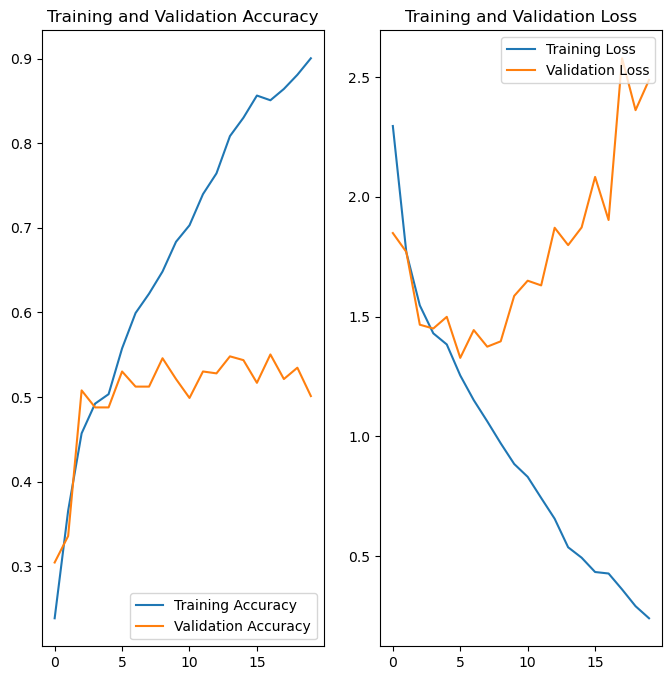

In [158]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [133]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here


# 36 and 41 is model accuracy for validation and test data: with 3 conv layers each with 32,64, 128 feature map



# model is overfitting with train accuracy high as 89* and validation accuracy of 50%



In [134]:
images, labels = next(iter(train_ds))
smpl_image = images[0]
smpl_label = labels[0]
print(smpl_image)

tf.Tensor(
[[[0.76388884 0.7101307  0.718464  ]
  [0.7627451  0.70735294 0.7019608 ]
  [0.7583333  0.70490193 0.6954248 ]
  ...
  [0.68676484 0.6254902  0.61454254]
  [0.7078431  0.6372549  0.6343137 ]
  [0.7026145  0.6374183  0.637745  ]]

 [[0.75996727 0.7084967  0.71290845]
  [0.7637255  0.7053922  0.70098037]
  [0.7637255  0.7053922  0.69673204]
  ...
  [0.70735306 0.63578445 0.6426472 ]
  [0.69754905 0.6338235  0.6338235 ]
  [0.69313735 0.6369281  0.6336602 ]]

 [[0.76029414 0.7053922  0.7142157 ]
  [0.7617647  0.70392156 0.702451  ]
  [0.76552284 0.70637256 0.6960784 ]
  ...
  [0.699183   0.6336601  0.6357842 ]
  [0.702451   0.6382353  0.6397059 ]
  [0.7022875  0.6313727  0.6334969 ]]

 ...

 [[0.745915   0.6897059  0.6931372 ]
  [0.74852943 0.6887255  0.6931372 ]
  [0.753268   0.6885621  0.699183  ]
  ...
  [0.66764754 0.5983662  0.5983662 ]
  [0.6671569  0.60245097 0.5926471 ]
  [0.6511438  0.59297395 0.5810458 ]]

 [[0.7367647  0.675817   0.6944444 ]
  [0.75441176 0.6848039  0

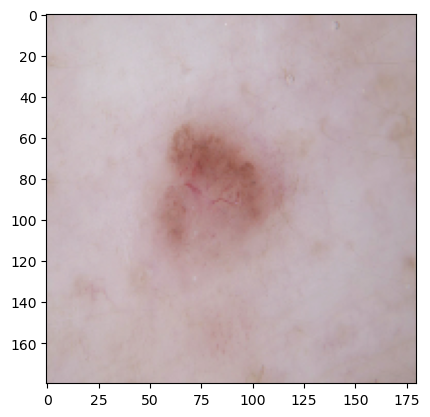

In [160]:
plt.imshow(smpl_image)

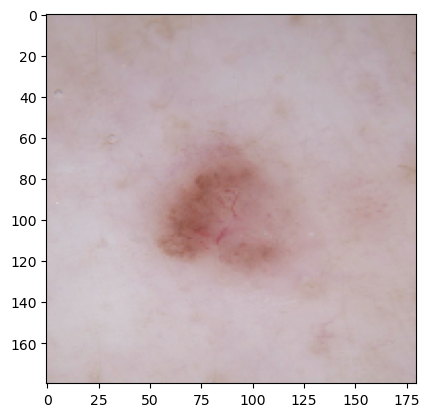

In [169]:
# data_augmentation = tf.keras.Sequential([
#   layers.RandomFlip("horizontal_and_vertical"),
#   layers.RandomRotation(0.2),
#   layers.RandomZoom(height_factor=0.1, width_factor=0.1),
#   layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
#   layers.RandomCrop(height=0.5, width=0.5)
# ])
tf.seed=123

# def augmentation(image):
#     img_aug_rc = tf.image.random_crop(value=image , size = (120,120,3))
#     img_aug_rf_lr = tf.image.random_flip_left_right(image)
#     img_aug_rf_ud = tf.image.random_flip_up_down(image)
#     img_aug_r90 = tf.image.rot90(image)
#     img_aug_rb = tf.image.random_brightness(image,  0.2)
#     # img_aug_rz = tf.image.random_resize(image,  size=(120, 120))
#     # img_aug_rh = tf.image.random_hue(image,  0.2)
#     return (img_aug_rc, img_aug_rf_lr, img_aug_rf_ud, img_aug_r90, img_aug_rb)



# img_aug = augmentation(smpl_image)

# j=0
# for i, img in enumerate(img_aug):
#     plt.subplot(2,3,i+1)
#     plt.imshow(img)

def augmentation(image):
    # image = tf.image.random_crop(value=image , size = (140,140,3))
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image)
    img_aug_rb = tf.image.random_brightness(image,  0.2)
    # image = tf.image.random_resize(image,  size=(120, 120))
    # img_aug_rh = tf.image.random_hue(image,  0.2)
    return image



img_aug = augmentation(smpl_image)
plt.imshow(img_aug)
# img_aug.numpy().shape



In [167]:
# data_augmentation = {
#     'flip': layers.RandomFlip("horizontal_and_vertical"),
#     'rotate': layers.RandomRotation(0.2),
#     'zoom': layers.RandomZoom(height_factor=0.1, width_factor=0.1),
#     'translate': layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
#     'crop': layers.RandomCrop(height=90, width=90)
# }

# for key, transformation

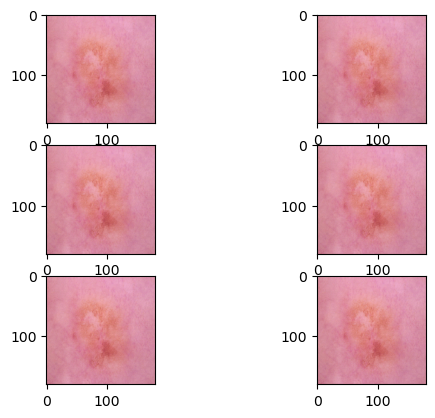

In [345]:
# transform_parameters = {
#     'theta': 5,
#     'tx':5,
#     'ty':6,
#     'zoom_range':0.2,
#     'shear': 30,
#     'flip_horizontal':True,
#     'flip_vertical':True}

# data_gen = ImageDataGenerator()

# augmented_images= []
# for _ in range(6):
#     transform_params = data_gen.get_random_transform(img_shape=smpl_image.numpy().shape)
#     aug_img = data_gen.apply_transform(smpl_image, transform_params)
#     # aug_img = data_gen.random_transform(smpl_image)
#     augmented_images.append(aug_img)

# for i in range(6):
#     plt.subplot(3,2,i+1)
#     plt.imshow(augmented_images[i])
# # plt.imshow(smpl_image)

### Todo:
### Create the model, compile and train the model


In [204]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes her

model = keras.Sequential(
[
# layers.RandomFlip("horizontal_and_vertical"),
# layers.RandomRotation(0.1),
# layers.RandomZoom(0.1),
# layers.RandomBrightness(0.2),


layers.Input(shape=(180, 180, 3)),
layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.1),

layers.Conv2D(32, kernel_size = (3,3), padding = 'same', strides=1, activation='relu'),
layers.MaxPool2D((2,2)),
layers.Dropout(0.2),
    

layers.Conv2D(64, kernel_size = (3,3), padding = 'same', strides=1, activation='relu'),
layers.MaxPool2D((2,2)),
layers.Dropout(0.2),


layers.Conv2D(128, kernel_size = (3,3), padding = 'same', strides=1, activation='relu'),
layers.MaxPool2D((2,2)),
layers.Dropout(0.2),


# layers.Conv2D(256, kernel_size = (3,3), padding = 'same', strides=1, activation='relu'),
# layers.MaxPool2D((2,2)),


layers.Flatten(),

layers.Dense(512, activation='relu'),
layers.Dropout(0.5),
layers.Dense(num_classes, 'softmax')
    ]
)





### Compiling the model

In [205]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [206]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_5 (RandomFlip)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_5               │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │    31,719,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,817,801 (121.38 MB)

 Trainable params: 31,817,801 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [207]:
## Your code goes here, note: train your model for 20 epochs
# history = ## your training code

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 342ms/step - accuracy: 0.1864 - loss: 3.9853 - val_accuracy: 0.2081 - val_loss: 2.0810
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 341ms/step - accuracy: 0.1781 - loss: 2.0485 - val_accuracy: 0.1969 - val_loss: 2.0485
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 365ms/step - accuracy: 0.2466 - loss: 2.0026 - val_accuracy: 0.3602 - val_loss: 1.9880
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 357ms/step - accuracy: 0.3207 - loss: 1.8852 - val_accuracy: 0.3579 - val_loss: 1.7930
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 348ms/step - accuracy: 0.4107 - loss: 1.6785 - val_accuracy: 0.4318 - val_loss: 1.6329
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 347ms/step - accuracy: 0.4635 - loss: 1.5629 - val_accuracy: 0.4609 - val_loss: 1.5905
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 339ms/step - accuracy: 0.4589 - loss: 1.4940 - val_accuracy: 0.5011 - val_loss: 1.4546
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 339ms/step - accuracy: 0.5173 - loss: 1.4106 - val_accu

### Visualizing the results

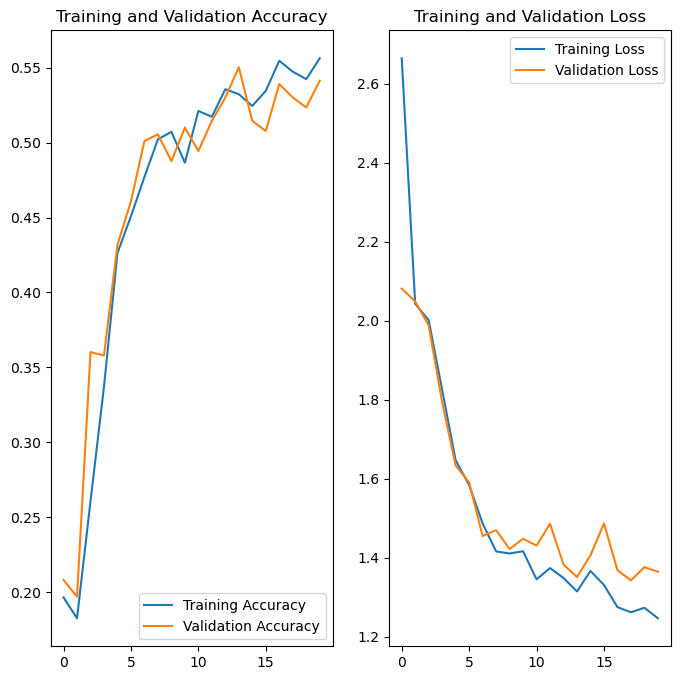

In [208]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [ ]:
# My model is now not overfitting but accuracy is low: 61 train data and 59 for test data

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [236]:
from collections import Counter

i = 0
class_counter = Counter()
for _, labels in train_ds.as_numpy_iterator():
    class_counts = np.sum(labels, axis=0)
    class_count_dict = dict(enumerate(class_counts))
    class_counter.update(class_count_dict)    

for _, labels in val_ds.as_numpy_iterator():
    class_counts = np.sum(labels, axis=0)
    class_count_dict = dict(enumerate(class_counts))
    class_counter.update(class_count_dict)  

print(class_counter)


Counter({5: 462.0, 3: 438.0, 1: 376.0, 4: 357.0, 7: 181.0, 8: 139.0, 0: 114.0, 2: 95.0, 6: 77.0})


In [238]:
total = sum(class_counter.values())
for k,v in class_counter.items():
    print(f'class {k}:', v*100/total)
    

class 0: 5.091558731576597
class 1: 16.793211255024566
class 2: 4.242965609647164
class 3: 19.562304600267975
class 4: 15.944618133095132
class 5: 20.634211701652525
class 6: 3.439035283608754
class 7: 8.083966056275123
class 8: 6.208128628852166


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
    Class 6 have least sample 3.4% of total samples. 
#### - Which classes dominate the data in terms proportionate number of samples?
    Class 5 dominates data with 20% of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [248]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + '/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1745300E0>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to /Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 95 image(s) found.
Output directory set to /Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 438 image(s) found.
Output directory set to /Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 357 image(s) found.
Output directory set to /Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=957x640 at 0x1


Initialised with 462 image(s) found.
Output directory set to /Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1742BAAE0>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to /Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x362FFD670>: 100%|█


Initialised with 181 image(s) found.
Output directory set to /Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x167334BC0>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to /Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x36E3101D0>: 100%|█|


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [254]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [255]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/melanoma/output/melanoma_original_ISIC_0010140.jpg_78f66657-1dca-4054-ad52-b27e5eb09318.jpg',
 '/Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/melanoma/output/melanoma_original_ISIC_0010723.jpg_129b7d81-2774-4aae-a5dc-730aad3be3f4.jpg',
 '/Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/melanoma/output/melanoma_original_ISIC_0010631.jpg_5004a8e7-6433-4cfd-9f1b-74dccad35d93.jpg',
 '/Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/train/melanoma/output/melanoma_original_ISIC_0010808.jpg_2d551605-8ff3-4dc2-b3ac-a8f2148510ec.jpg',
 '/Users/rajendrakumar.sharma/Desktop/upgrad/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collabora

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [265]:
class_counter = Counter()
for path in path_list:
    class_label = os.path.basename(os.path.dirname(os.path.dirname(path)))
    class_counter[class_label]+=1
print(class_counter)


Counter({'melanoma': 500, 'pigmented benign keratosis': 500, 'nevus': 500, 'basal cell carcinoma': 500, 'actinic keratosis': 500, 'squamous cell carcinoma': 500, 'vascular lesion': 500, 'seborrheic keratosis': 500, 'dermatofibroma': 500})


In [259]:
# dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
# df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])# 
new_df = original_df.append(df2)

In [ ]:
# new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [333]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [334]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size,
 shuffle=True)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [335]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size,
 shuffle=True)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [336]:
# _, labels=next(iter(val_ds))
# labels

#### **Todo:** Create your model (make sure to include normalization)

In [337]:
## your code goes here


## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes her

model = keras.Sequential(
[
# layers.RandomFlip("horizontal_and_vertical"),
# layers.RandomRotation(0.1),
# layers.RandomZoom(0.1),
# layers.RandomBrightness(0.2),


layers.Input(shape=(180, 180, 3)),
# layers.RandomFlip("horizontal_and_vertical"),
# layers.RandomRotation(0.1),

layers.Conv2D(32, kernel_size = (3,3), padding = 'same', strides=1, activation='relu'),
layers.BatchNormalization(),
layers.MaxPool2D((2,2)),
layers.Dropout(0.2),
    

layers.Conv2D(64, kernel_size = (3,3), padding = 'same', strides=1, activation='relu'),
layers.BatchNormalization(),
layers.MaxPool2D((2,2)),
layers.Dropout(0.2),


layers.Conv2D(128, kernel_size = (3,3), padding = 'same', strides=1, activation='relu'),
layers.BatchNormalization(),
layers.MaxPool2D((2,2)),
layers.Dropout(0.2),


# layers.Conv2D(256, kernel_size = (3,3), padding = 'same', strides=1, activation='relu'),
# layers.MaxPool2D((2,2)),


layers.Flatten(),

# layers.Dense(512, activation='relu'),
layers.BatchNormalization(),
layers.Dropout(0.5),
layers.Dense(num_classes, 'softmax')
    ]
)




#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [338]:
## your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [339]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)              │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 61952)          │       247,808 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 9)              │       557,577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 899,529 (3.43 MB)

 Trainable params: 775,177 (2.96 MB)

 Non-trainable params: 124,352 (485.75 KB)

#### **Todo:**  Train your model

In [340]:
# images , labels = next(iter(val_ds))
# print(images.shape, labels.shape)

In [341]:
train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

In [ ]:
# epochs = 30
## Your code goes here, use 50 epochs.
# history = # your model fit code
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 74s 428ms/step - accuracy: 0.3542 - loss: 5.7971 - val_accuracy: 0.1403 - val_loss: 11.4572
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 72s 422ms/step - accuracy: 0.4637 - loss: 5.9644 - val_accuracy: 0.1641 - val_loss: 11.3727
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 67s 394ms/step - accuracy: 0.5560 - loss: 4.9205 - val_accuracy: 0.3222 - val_loss: 8.6708
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 66s 390ms/step - accuracy: 0.6055 - loss: 4.5848 - val_accuracy: 0.3326 - val_loss: 15.9475
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 67s 396ms/step - accuracy: 0.6405 - loss: 4.2421 - val_accuracy: 0.4439 - val_loss: 8.3900
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 68s 403ms/step - accuracy: 0.6750 - loss: 4.0153 - val_accuracy: 0.4588 - val_loss: 7.3183
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 69s 406ms/step - accuracy: 0.6910 - loss: 3.9577 - val_accuracy: 0.4603 - val_loss: 8.6017
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 69s 409ms/step - accuracy: 0.7318 - loss

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

